In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
import pickle


In [2]:
data=pd.read_csv("datasets/diabetes_data_upload.csv")
x=data.drop(['class'],axis=1)
y=data['class']
#x=data.iloc[:,:-1].values
#y=data.iloc[:,-1].values

In [3]:
data['class'].value_counts()

class
Positive    320
Negative    200
Name: count, dtype: int64

In [4]:
data.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [5]:
data['Age'].describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [7]:
cat_columns=x.select_dtypes(include='object').columns
num_columns=x.select_dtypes(exclude='object').columns
print(cat_columns,num_columns)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object') Index(['Age'], dtype='object')


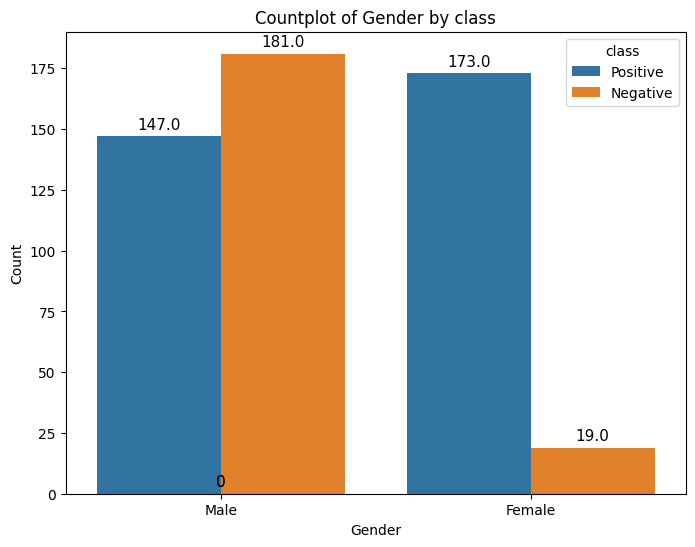

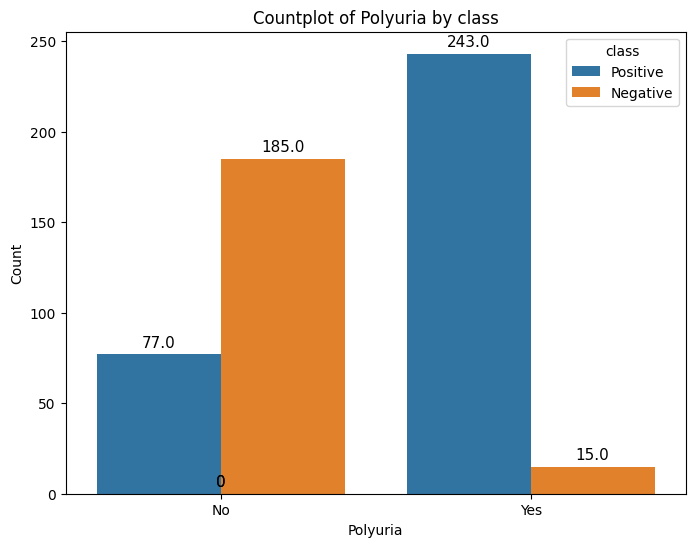

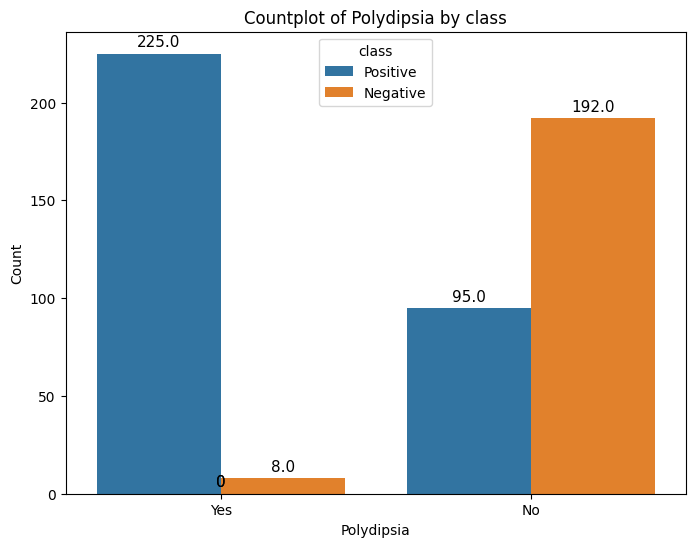

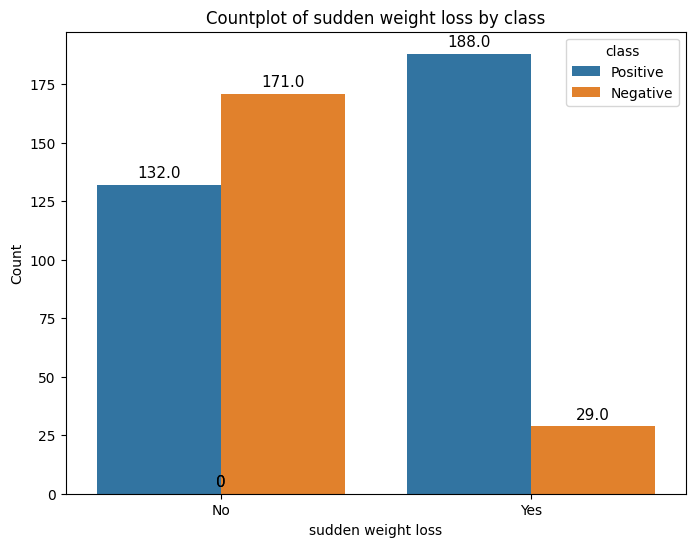

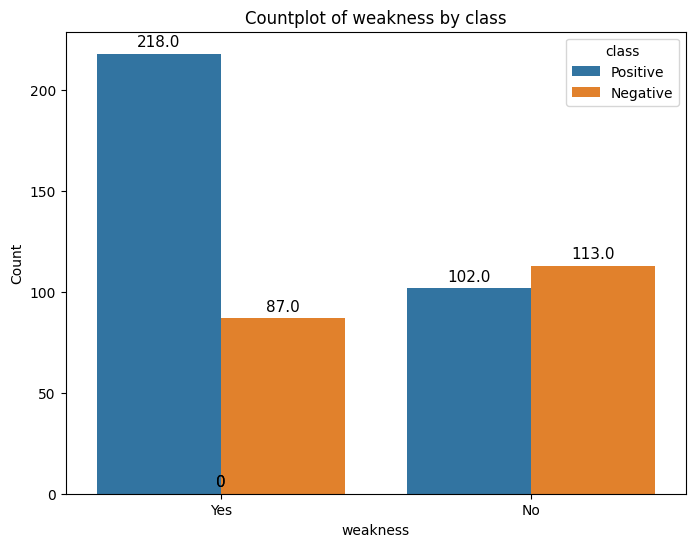

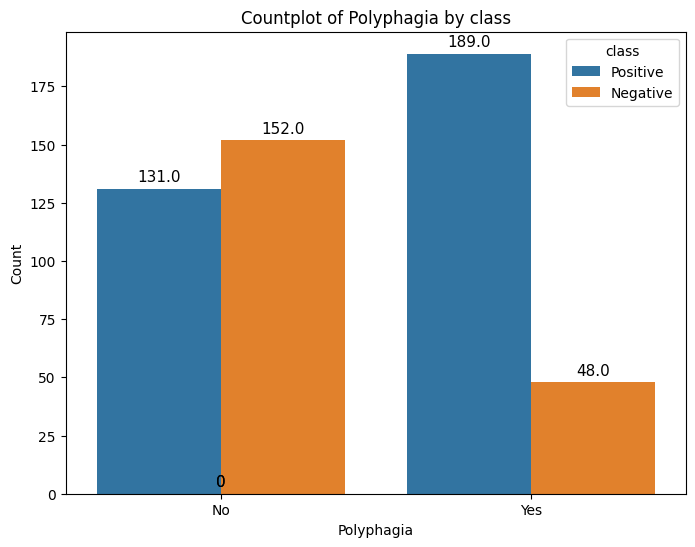

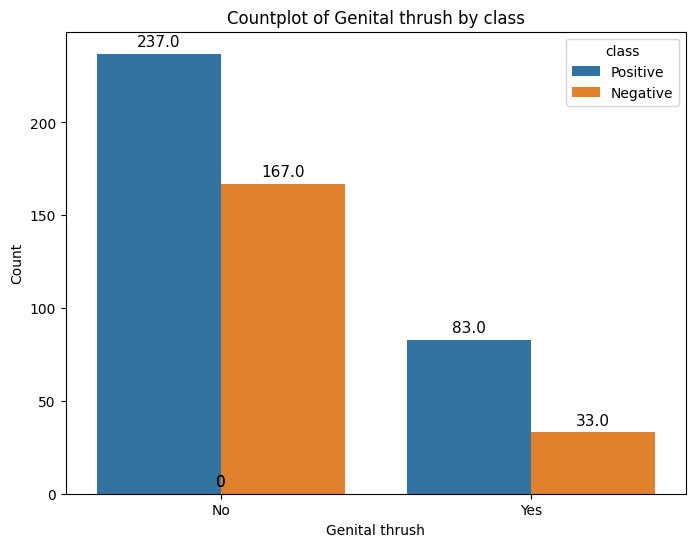

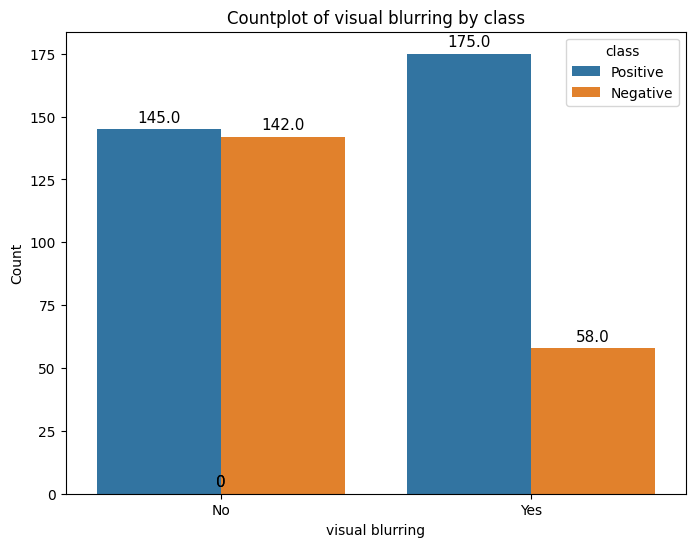

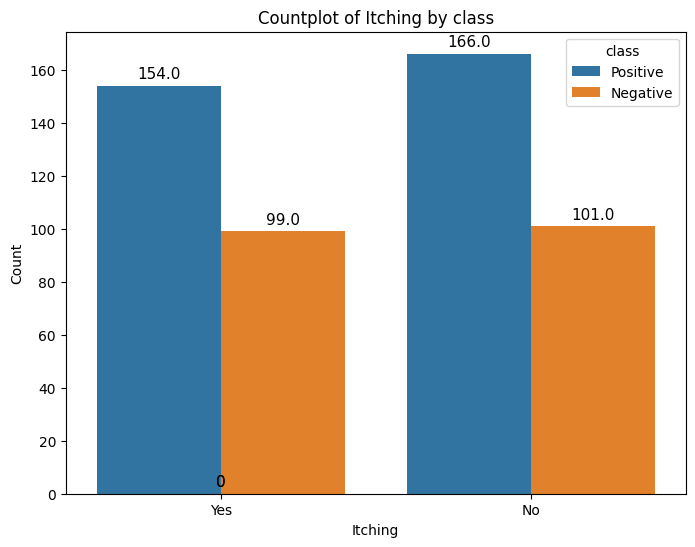

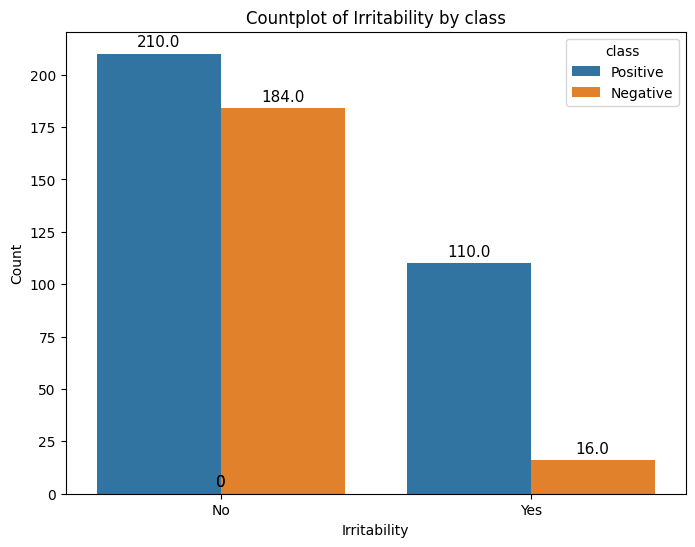

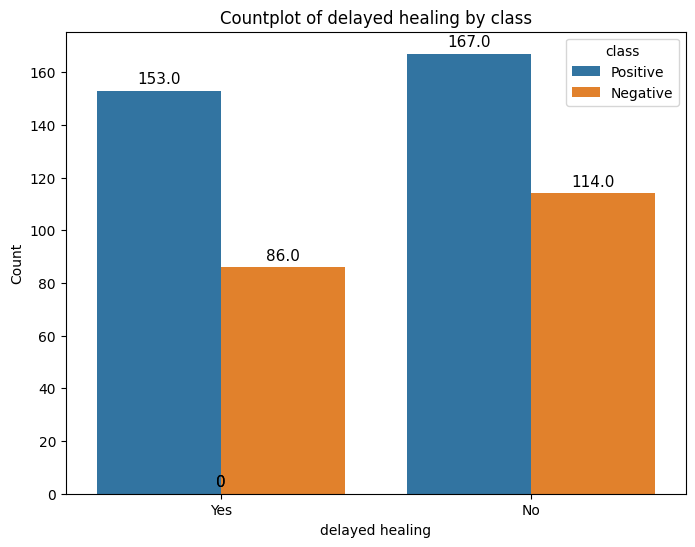

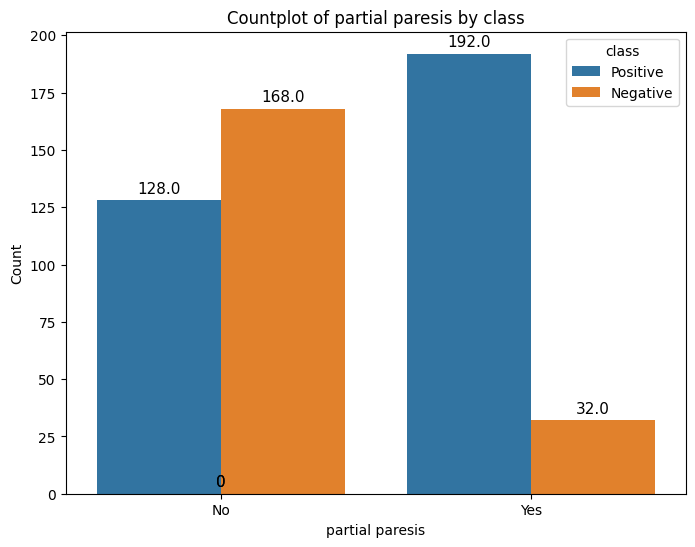

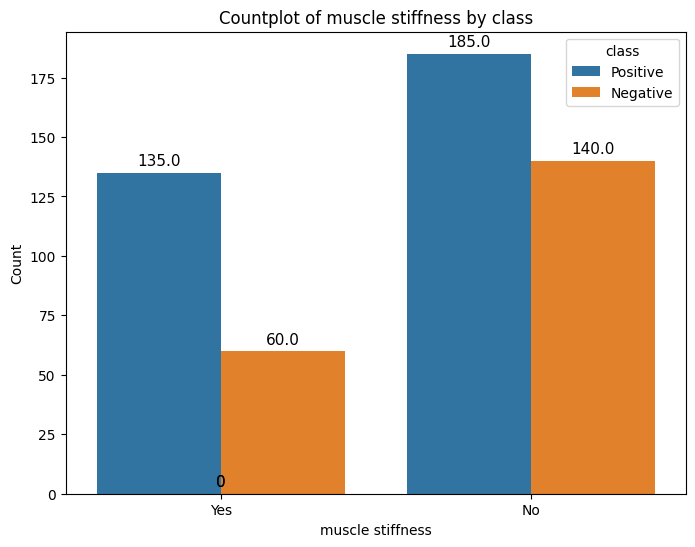

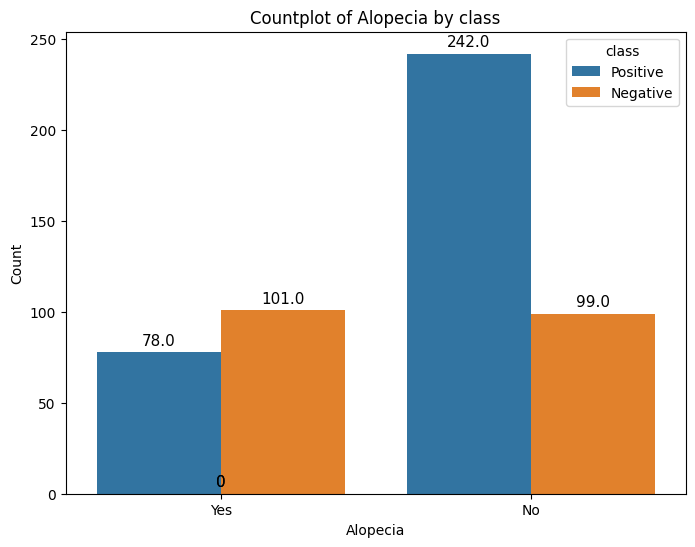

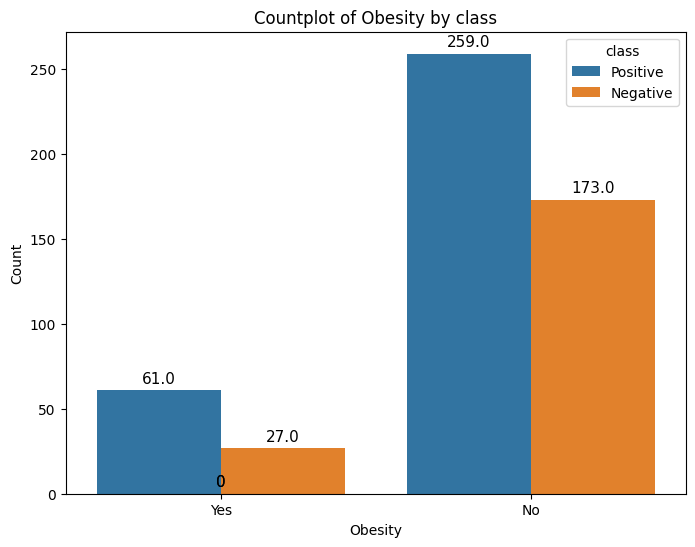

In [58]:
for feature in cat_columns:
    plt.figure(figsize=(8, 6))
    ax=sns.countplot(data=data, x=feature, hue="class")  # 'hue' differentiates by class
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'baseline', fontsize=11, color='black', 
                    xytext = (0, 5), textcoords = 'offset points')
    plt.title(f'Countplot of {feature} by {"class"}')
    plt.ylabel('Count')
    plt.xlabel(feature)
    file_name = f"plots/{feature}_countplot.png"
    plt.savefig(file_name, bbox_inches='tight')
    plt.show()

In [9]:
Scaler=StandardScaler()
x_Encoder=OneHotEncoder()
y_Encoder=LabelEncoder()

In [10]:
Transforming=ColumnTransformer(
    [("OneHotEncoder", x_Encoder, cat_columns),
     ("StandardScaler", Scaler, num_columns)
    ]
)

In [11]:
x_train_tr=Transforming.fit_transform(x_train)
x_test_tr=Transforming.transform(x_test)

In [12]:
x_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
321,34,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No
260,33,Male,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No
21,54,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No
85,49,Female,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes
178,50,Female,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No


In [13]:
print(x_train_tr[0])

[ 1.          0.          1.          0.          1.          0.
  1.          0.          1.          0.          1.          0.
  1.          0.          1.          0.          1.          0.
  1.          0.          1.          0.          1.          0.
  1.          0.          1.          0.          1.          0.
 -1.17180056]


In [14]:
y_train_le=y_Encoder.fit_transform(y_train)
y_test_le=y_Encoder.transform(y_test)

In [15]:
models_dict={
    "LogisticRegression":LogisticRegression(),
    "SupportVector":SVC(),
    "NaiveBayes":GaussianNB(),
    "KnnClassifier":KNeighborsClassifier(),
    "DecisionTree":DecisionTreeClassifier(),
    "RandomForest":RandomForestClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "GradientBoost":GradientBoostingClassifier(),    
}

In [16]:
for i in range(len(list(models_dict))):
    model=list(models_dict.values())[i]
    model.fit(x_train_tr,y_train_le)

    y_train_pred=model.predict(x_train_tr)
    y_test_pred=model.predict(x_test_tr)

    train_acc=accuracy_score(y_train_le,y_train_pred)
    train_f1=f1_score(y_train_le,y_train_pred,average='weighted')
    train_prec=precision_score(y_train_le,y_train_pred,average='weighted')
    train_recall=recall_score(y_train_le,y_train_pred,average='weighted')
    #train_roc=roc_auc_score(y_train,y_train_pred,average='weighted',multi_class="ovo")

    test_acc=accuracy_score(y_test_le,y_test_pred)
    test_f1=f1_score(y_test_le,y_test_pred,average='weighted')
    test_prec=precision_score(y_test_le,y_test_pred,average='weighted')
    test_recall=recall_score(y_test_le,y_test_pred,average='weighted')
    #test_roc=roc_auc_score(y_test,y_test_pred,average='weighted',multi_class='ovo')

    print(list(models_dict.keys())[i])
    print("Training AccuracyScore:{:.4f}".format(train_acc))
    print("Training F1Score:{:.4f}".format(train_f1))
    print("Training PrecisionScore:{:.4f}".format(train_prec))
    print("Training RecallScore:{:.4f}".format(train_recall))
    #print("RocAocScore:{:.4f}".format(train_roc))
    print("Test AccuracyScore:{:.4f}".format(test_acc))
    print("Test F1Score:{:.4f}".format(test_f1))
    print("Test PrecisionScore:{:.4f}".format(test_prec))
    print("Test RecallScore:{:.4f}".format(test_recall))
    print('\n')


LogisticRegression
Training AccuracyScore:0.9308
Training F1Score:0.9310
Training PrecisionScore:0.9315
Training RecallScore:0.9308
Test AccuracyScore:0.9077
Test F1Score:0.9090
Test PrecisionScore:0.9172
Test RecallScore:0.9077


SupportVector
Training AccuracyScore:0.9872
Training F1Score:0.9871
Training PrecisionScore:0.9874
Training RecallScore:0.9872
Test AccuracyScore:0.9769
Test F1Score:0.9770
Test PrecisionScore:0.9771
Test RecallScore:0.9769


NaiveBayes
Training AccuracyScore:0.9077
Training F1Score:0.9073
Training PrecisionScore:0.9075
Training RecallScore:0.9077
Test AccuracyScore:0.9154
Test F1Score:0.9156
Test PrecisionScore:0.9159
Test RecallScore:0.9154


KnnClassifier
Training AccuracyScore:0.9590
Training F1Score:0.9592
Training PrecisionScore:0.9607
Training RecallScore:0.9590
Test AccuracyScore:0.9385
Test F1Score:0.9392
Test PrecisionScore:0.9440
Test RecallScore:0.9385


DecisionTree
Training AccuracyScore:1.0000
Training F1Score:1.0000
Training PrecisionScore:1.0

d:\ML_ENV\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GradientBoost
Training AccuracyScore:0.9974
Training F1Score:0.9974
Training PrecisionScore:0.9975
Training RecallScore:0.9974
Test AccuracyScore:0.9692
Test F1Score:0.9694
Test PrecisionScore:0.9700
Test RecallScore:0.9692




In [17]:
pickle.dump(Transforming,open('models/Transformer.pkl','wb'))
pickle.dump(y_Encoder,open('models/Encoder.pkl','wb'))
pickle.dump(models_dict["RandomForest"],open('models/Classifier.pkl','wb'))